# Itroduction of dataset 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# Categorical Feature Analysis (Conversion des caractéristiques catégorielles en caractéristiques numériques) — one-hot

In [6]:
from sklearn.preprocessing import OneHotEncoder

#Voir les catégories de la colonne CLASS"
print(df["class"].unique())

['GALAXY' 'QSO' 'STAR']


In [7]:
# Créer un objet encodeur One-Hot
encoder = OneHotEncoder()

# Convertir la colonne "CLASS" en tableau 2D
class_values = df["class"].values.reshape(-1, 1)

# Effectuer l'encodage One-Hot sur la colonne "CLASS"
class_one_hot = encoder.fit_transform(class_values).toarray()

# Convertir les données encodées en DataFrame, et nommer les colonnes avec les noms des catégories
class_names = ["GALAXIE", "QSO", "ETOILE"]
class_one_hot_df = pd.DataFrame(class_one_hot, columns=[f"class-{name}" for name in class_names])

# Ajouter les données encodées au dataset d'origine
df = pd.concat([df, class_one_hot_df], axis=1)

# Supprimer la colonne "CLASS" originale
df.drop("class", axis=1, inplace=True)

# Afficher les premières lignes du dataset encodé
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class-GALAXIE,class-QSO,class-ETOILE
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1.0,0.0,0.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1.0,0.0,0.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1.0,0.0,0.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1.0,0.0,0.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1.0,0.0,0.0


In [8]:
# Supprimer la colonne "obj_ID"
df.drop("obj_ID", axis=1, inplace=True)
df.drop("run_ID", axis=1, inplace=True)
df.drop("rerun_ID", axis=1, inplace=True)
df.drop("cam_col", axis=1, inplace=True)
df.drop("field_ID", axis=1, inplace=True)
df.drop("spec_obj_ID", axis=1, inplace=True)
df.drop("fiber_ID", axis=1, inplace=True)
df.head()


,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXIE,class-QSO,class-ETOILE
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,56354,1.0,0.0,0.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,58158,1.0,0.0,0.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,55592,1.0,0.0,0.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,58039,1.0,0.0,0.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,56187,1.0,0.0,0.0


In [9]:
from sklearn.preprocessing import StandardScaler

# Obtenir les noms de colonnes des caractéristiques autres que la classe
non_class_columns = [col for col in df.columns if col not in [f"class-{name}" for name in class_names]]

# Standardiser les caractéristiques autres que la classe
scaler = StandardScaler()
df[non_class_columns] = scaler.fit_transform(df[non_class_columns])

# Afficher le dataset standardisé
print(df.head())


      alpha     delta         u         g         r         i         z  \
0 -0.434604  0.425529  0.059755  0.054926  0.403962  0.046007  0.003937   
1 -0.339921  0.363402  0.088045  0.072456  1.584406  1.185097  0.092835   
2 -0.367251  0.582713  0.103327  0.067165  0.519745  0.150019  0.008808   
3  1.669523 -1.249105  0.004921  0.102210  1.059904  0.807610  0.018321   
4  1.737310 -0.150242 -0.080055 -0.092948 -1.697421 -1.767887 -0.098468   

   redshift     plate       MJD  class-GALAXIE  class-QSO  class-ETOILE  
0  0.079557  0.228633  0.423203            1.0        0.0           0.0  
1  0.277096  1.797924  1.420729            1.0        0.0           0.0  
2  0.092423 -0.190025  0.001854            1.0        0.0           0.0  
3  0.486770  1.358942  1.354927            1.0        0.0           0.0  
4 -0.630267  0.333297  0.330860            1.0        0.0           0.0  


Conclusion : La distribution des différentes classes dans le dataset n'est pas équilibrée. Il est nécessaire de diviser et sélectionner les données.

In [10]:
# Vérifier s'il y a des valeurs manquantes dans le dataset
missing_values = df.isnull()

# Supprimer les lignes qui contiennent des valeurs manquantes
df = df.dropna()

# Afficher le dataset après avoir supprimé les valeurs manquantes
df.head()


,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXIE,class-QSO,class-ETOILE
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.079557,0.228633,0.423203,1.0,0.0,0.0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.277096,1.797924,1.420729,1.0,0.0,0.0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,0.092423,-0.190025,0.001854,1.0,0.0,0.0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,0.486770,1.358942,1.354927,1.0,0.0,0.0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.630267,0.333297,0.330860,1.0,0.0,0.0


# Dealing with ClassNumData Imbalancing (Traiter les déséquilibres dans la quantité de données provenant de trois catégories différentes)

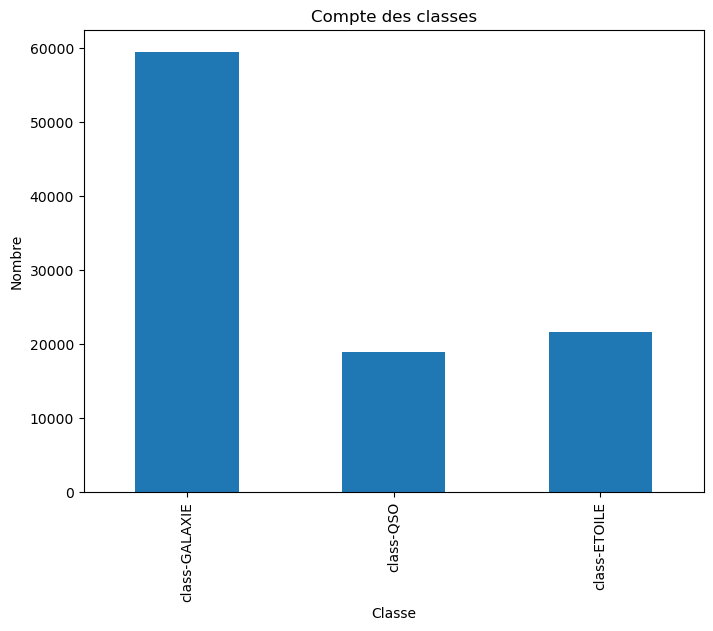

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que pca_df contient le dataset après traitement

# Calculer le nombre total d'éléments pour chaque catégorie
class_counts = df.iloc[:, -3:].sum()

# Dessiner un diagramme à barres
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Classe")
ax.set_ylabel("Nombre")
ax.set_title("Compte des classes")
plt.show()


In [12]:
# Sous-échantillonner le nombre d'échantillons pour chaque classe au nombre minimum d'échantillons parmi toutes les classes ---> Afficher le nombre minimum
min_samples = int(min(df['class-GALAXIE'].sum(), df['class-QSO'].sum(), df['class-ETOILE'].sum()))
print(min_samples)


18961


In [13]:
# Sous-échantillonner chaque classe pour atteindre le nombre minimum d'échantillons parmi toutes les classes
galaxy = df[df['class-GALAXIE'] == 1].sample(n=min_samples, random_state=42)
qso = df[df['class-QSO'] == 1].sample(n=min_samples, random_state=42)
star = df[df['class-ETOILE'] == 1].sample(n=min_samples, random_state=42)

# Fusionner les trois datasets sous-échantillonnés
df = pd.concat([galaxy, qso, star])

# Afficher le dataset équilibré
df.head()


,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXIE,class-QSO,class-ETOILE
44131,-0.421220,-0.543938,-0.053516,-0.074639,-1.425347,-1.461861,-0.079930,-0.587424,-0.914887,-0.848586,1.0,0.0,0.0
34126,-0.470293,0.372934,0.030482,0.072297,1.384881,1.223712,0.082385,0.355918,1.793182,1.409117,1.0,0.0,0.0
9667,0.248027,0.232183,-0.033971,-0.053856,-1.093097,-1.099368,-0.058296,-0.549109,-1.070021,-1.169852,1.0,0.0,0.0
52810,1.461986,-1.047748,0.090875,0.038231,0.223932,0.032116,0.001695,-0.143718,-0.359047,-0.125878,1.0,0.0,0.0
98130,0.812023,0.044296,0.025112,0.062006,0.474602,0.227236,0.014145,-0.089991,-0.325175,0.054937,1.0,0.0,0.0


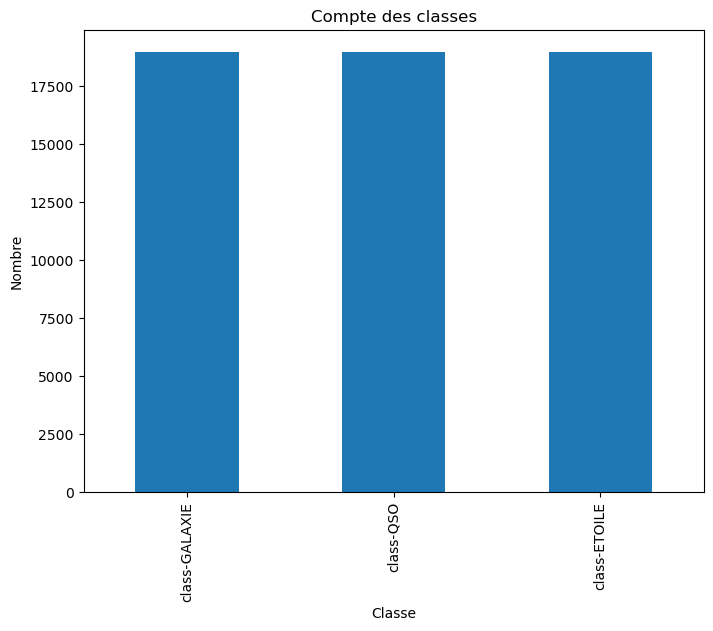

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que pca_df contient le dataset après traitement

# Calculer le nombre total d'éléments pour chaque catégorie
under_sample_data = df.copy()
class_counts = under_sample_data.iloc[:, -3:].sum()

# Dessiner un diagramme à barres
fig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Classe")
ax.set_ylabel("Nombre")
ax.set_title("Compte des classes")
plt.show()


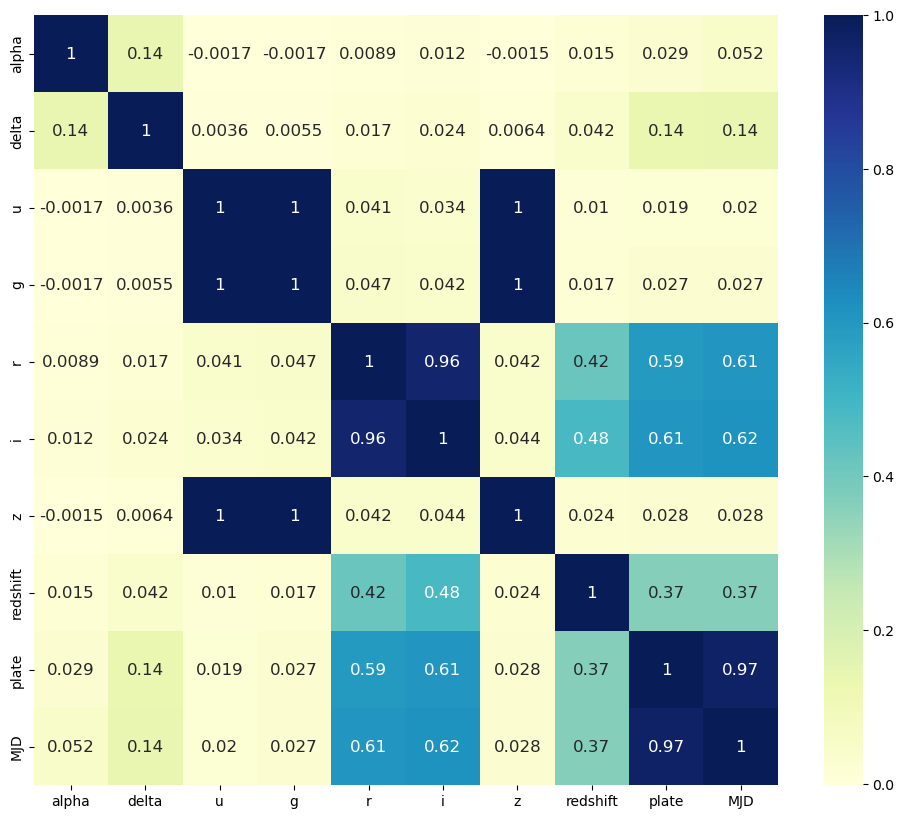

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une copie du dataset et supprimer la colonne "class"
df_copy = df.copy()
df_copy.drop(["class-GALAXIE", "class-QSO", "class-ETOILE"], axis=1, inplace=True)

# Calculer la matrice de corrélation entre les caractéristiques
corr_matrix = df_copy.corr()

# Créer une figure contenant plusieurs sous-graphiques, et ajuster la taille et la résolution des sous-graphiques
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

# Dessiner une heatmap de la matrice de corrélation, et augmenter la taille de la police des annotations
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"fontsize": 12}, ax=ax)

# Ajouter la colonne "class" au dataset
class_cols = ["class-GALAXIE", "class-QSO", "class-ETOILE"]
df_with_class = pd.concat([df_copy, df[class_cols]], axis=1)

df=df_with_class
# Afficher le graphique
plt.show()


# Analyser la corrélation des caractéristiques individuelles Filtrer les caractéristiques à faible corrélation

Ce diagramme est une carte thermique de la matrice des coefficients de corrélation qui montre le degré de corrélation entre les caractéristiques individuelles. La couleur de la carte thermique représente l'ampleur du coefficient de corrélation, les couleurs plus foncées indiquant un coefficient de corrélation plus élevé et les couleurs plus claires un coefficient de corrélation plus faible.


Plus précisément, chaque ligne et chaque colonne représentent une caractéristique, et chaque élément de la matrice représente le coefficient de corrélation entre deux caractéristiques. Le coefficient de corrélation prend des valeurs comprises entre [-1, 1], où 1 indique une corrélation positive, -1 une corrélation négative et 0 une absence de corrélation.


Les carrés sur la diagonale de cette carte thermique représentent le coefficient de corrélation de chaque caractéristique elle-même, puisque chaque caractéristique doit avoir un coefficient de corrélation de 1 avec elle-même. Les moitiés supérieure et inférieure de la matrice sont symétriques, car les coefficients de corrélation entre les deux caractéristiques sont mutuels.


Grâce à cette carte thermique, nous pouvons rapidement comprendre le degré de corrélation entre les caractéristiques individuelles, ce qui facilite la sélection et l'ingénierie des caractéristiques. Par exemple, les caractéristiques présentant des coefficients de corrélation élevés peuvent être fusionnées ou supprimées afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.
Pour les coefficients de corrélation entre les caractéristiques, nous adoptons généralement l'approche suivante :



Corrélation positive (corrélation > 0) : si deux caractéristiques sont positivement corrélées, leurs valeurs augmentent ou diminuent généralement en même temps. Lors de la sélection des caractéristiques, si le coefficient de corrélation de deux caractéristiques est élevé, il faut envisager de les combiner en une seule caractéristique afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.


Corrélation négative (corrélation < 0) : si deux caractéristiques sont négativement corrélées, la valeur prise pour une caractéristique augmente et la valeur prise pour l'autre caractéristique diminue généralement. Lors de la sélection des caractéristiques, si le coefficient de corrélation de deux caractéristiques est élevé, il faut envisager de supprimer l'une des caractéristiques afin d'éviter la redondance des caractéristiques et d'améliorer les performances du modèle.


Non corrélé (corrélation = 0) : si deux caractéristiques ne sont pas corrélées, les modifications de leurs valeurs n'auront aucun effet l'une sur l'autre. Lors de la sélection des caractéristiques, si deux caractéristiques ont un coefficient de corrélation de 0, elles peuvent être retenues car elles peuvent toutes deux contribuer aux résultats de la prédiction du modèle.


Il est important de noter que l'analyse de corrélation n'est qu'une analyse préliminaire de la corrélation entre les caractéristiques et ne peut remplacer les étapes de sélection et d'ingénierie des caractéristiques. Lors de la sélection et de l'ingénierie des caractéristiques, d'autres facteurs doivent être pris en compte, tels que la quantité d'informations contenues dans les caractéristiques, la complexité entre les caractéristiques, etc.

In [16]:
# Effectuer une analyse en composantes principales 
# Supprimer les caractéristiques fortement corrélées
df.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,class-GALAXIE,class-QSO,class-ETOILE
44131,-0.421220,-0.543938,-0.053516,-0.074639,-1.425347,-1.461861,-0.079930,-0.587424,-0.914887,-0.848586,1.0,0.0,0.0
34126,-0.470293,0.372934,0.030482,0.072297,1.384881,1.223712,0.082385,0.355918,1.793182,1.409117,1.0,0.0,0.0
9667,0.248027,0.232183,-0.033971,-0.053856,-1.093097,-1.099368,-0.058296,-0.549109,-1.070021,-1.169852,1.0,0.0,0.0
52810,1.461986,-1.047748,0.090875,0.038231,0.223932,0.032116,0.001695,-0.143718,-0.359047,-0.125878,1.0,0.0,0.0
98130,0.812023,0.044296,0.025112,0.062006,0.474602,0.227236,0.014145,-0.089991,-0.325175,0.054937,1.0,0.0,0.0


# PCA Analyse en composantes principales

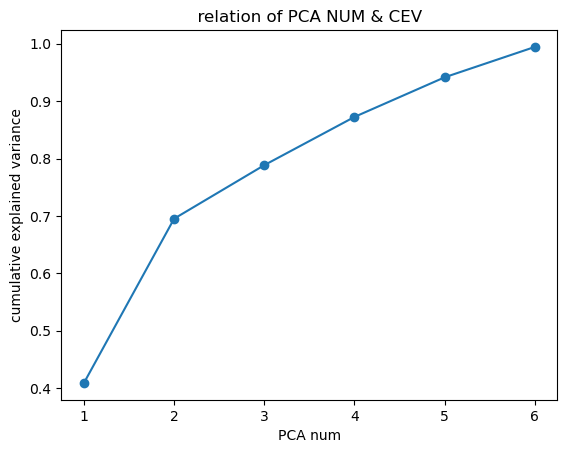

,PC1,PC2,PC3,PC4,PC5,PC6,class-GALAXIE,class-QSO,class-ETOILE
0,0.379575,-2.580113,0.448007,0.001634,0.215943,-0.698166,1.0,0.0,0.0
1,-0.376989,2.535592,-0.325388,-1.134650,0.354720,0.056924,1.0,0.0,0.0
2,0.321800,-2.401866,-0.251675,0.534032,0.074887,0.058895,1.0,0.0,0.0
3,-0.043073,-0.420810,-0.116922,0.240209,-1.838024,-0.095070,1.0,0.0,0.0
4,-0.066674,-0.047009,-0.439459,0.162686,-0.752689,0.462632,1.0,0.0,0.0


In [17]:
from sklearn.decomposition import PCA
import pandas as pd

# Créer une copie de l'ensemble de données et supprimer la colonne "class"
df_copy = df.copy()
df_copy.drop(["class-GALAXIE", "class-QSO", "class-ETOILE"], axis=1, inplace=True)


pca = PCA(n_components=6)
import numpy as np
import matplotlib.pyplot as plt

# Créer un modèle PCApca = PCA(n_components=8)
pca.fit(df_copy)

# Calculer la proportion de variance expliquée pour chaque composante principale
variance_ratio = pca.explained_variance_ratio_

# Calcul de la variance expliquée cumulative
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Tracer un graphique linéaire de la relation entre le nombre de composantes principales et la variance expliquée cumulative.
plt.plot(range(1, len(variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('PCA num')
plt.ylabel('cumulative explained variance')
plt.title('  relation of PCA NUM & CEV  ')
plt.show()


# Création d'un modèle PCA Sélection des dimensions 6 dimensions
pca = PCA(n_components=6)

# Réduction de la dimensionnalité de l'PCA pour les variables indépendantes
df_copy = pca.fit_transform(df_copy)

# Ajouter la colonne "classe" à l'ensemble de données
class_cols = ["class-GALAXIE", "class-QSO", "class-ETOILE"]
df_class = df[class_cols].reset_index(drop=True)  # 将 "class" 列单独取出，并重置索引
df_pca = pd.DataFrame(data=df_copy, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

# Splice df_pca and df_class into a new dataset 
df_with_class = pd.concat([df_pca, df_class], axis=1)
df = df_with_class
df.head()

Le graphique de la relation entre le nombre de composantes principales et la variance expliquée cumulée montre la relation entre la proportion de variance expliquée par chaque composante principale et la variance expliquée cumulée. L'axe X du graphique représente le nombre de composantes principales, tandis que l'axe Y représente la variance expliquée cumulée.

Dans le graphique, chaque point de données représente la variance cumulative expliquée par les n premières composantes principales. Nous pouvons observer la forme de la courbe pour déterminer le nombre de composantes principales à utiliser pour expliquer la variance des données. En général, nous souhaitons sélectionner le nombre de composantes principales qui peuvent expliquer la majeure partie de la variance.

Plus précisément, nous pouvons déterminer si le nombre de composantes principales est approprié en fonction de la pente de la courbe. Lorsque la pente de la courbe devient plate, la vitesse d'augmentation de la variance expliquée cumulée ralentit, ce qui signifie que le nombre de composantes principales choisi après ce point ne pourra pas expliquer la variance de manière significative. Nous pouvons choisir le nombre de composantes principales à l'endroit où la pente de la courbe devient plate.

En général, nous souhaitons sélectionner le nombre de composantes principales qui expliquent une proportion de variance supérieure à 70% ou 80%, afin de nous assurer que les composantes principales sélectionnées peuvent expliquer la majeure partie de la variance.

Ainsi, nous constatons que la variance expliquée cumulée pour six composantes principales est proche de 1. À ce stade, l'ajout de composantes principales supplémentaires n'améliorera pas significativement la variance expliquée cumulée.


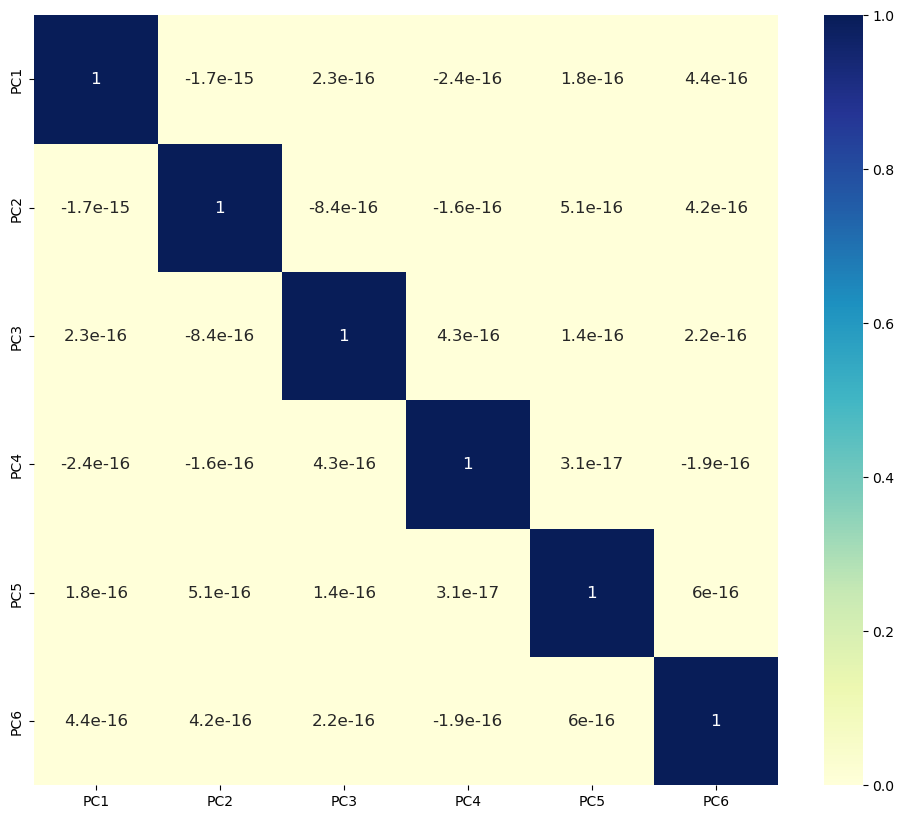

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une copie du dataset et supprimer la colonne "class"
df_copy = df.copy()
df_copy.drop(["class-GALAXIE", "class-QSO", "class-ETOILE"], axis=1, inplace=True)

# Calculer la matrice de corrélation entre les caractéristiques
corr_matrix = df_copy.corr()

# Créer une figure contenant plusieurs sous-graphiques, et ajuster la taille et la résolution des sous-graphiques
fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

# Dessiner une heatmap de la matrice de corrélation, et augmenter la taille de la police des annotations
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"fontsize": 12}, ax=ax)

# Ajouter la colonne "class" au dataset
class_cols = ["class-GALAXIE", "class-QSO", "class-ETOILE"]
df_with_class = pd.concat([df_copy, df[class_cols]], axis=1)

df=df_with_class

# Afficher le graphique
plt.show()


# En utilisant les deux premières composantes principales, afficher les trois classes dans un graphique de dispersion.

In [19]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,class-GALAXIE,class-QSO,class-ETOILE
0,0.379575,-2.580113,0.448007,0.001634,0.215943,-0.698166,1.0,0.0,0.0
1,-0.376989,2.535592,-0.325388,-1.134650,0.354720,0.056924,1.0,0.0,0.0
2,0.321800,-2.401866,-0.251675,0.534032,0.074887,0.058895,1.0,0.0,0.0
3,-0.043073,-0.420810,-0.116922,0.240209,-1.838024,-0.095070,1.0,0.0,0.0
4,-0.066674,-0.047009,-0.439459,0.162686,-0.752689,0.462632,1.0,0.0,0.0


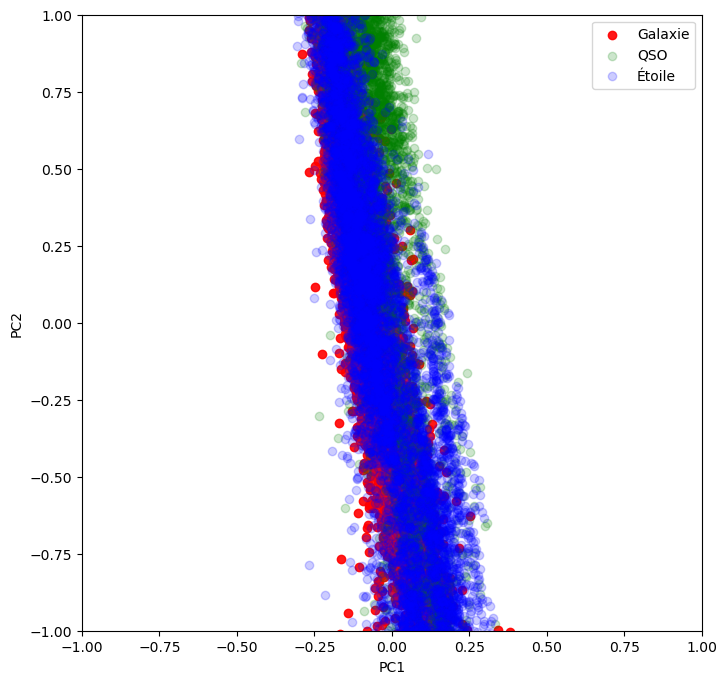

In [20]:
import matplotlib.pyplot as plt


# Diviser le dataset en trois sous-ensembles selon les classes
galaxy_df = df[df['class-GALAXIE'] == 1]
qso_df = df[df['class-QSO'] == 1]
star_df = df[df['class-ETOILE'] == 1]

# Créer une figure contenant des sous-graphiques
fig, ax = plt.subplots(figsize=(8, 8))

# Dessiner un graphique de dispersion
ax.scatter(galaxy_df['PC1'], galaxy_df['PC2'], color='red', label='Galaxie', alpha=0.9)
ax.scatter(qso_df['PC1'], qso_df['PC2'], color='green', label='QSO', alpha=0.2)
ax.scatter(star_df['PC1'], star_df['PC2'], color='blue', label='Étoile', alpha=0.2)

# Ajouter une légende et des étiquettes
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Définir les limites des axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Afficher le graphique
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

#Supposons que pca_df contienne l'ensemble des données traitées.

#Calculer le total pour chaque catégorieunder_sample_data= df.copy()
class_counts = under_sample_data.iloc[:, -3:].sum()

#Dessiner des diagrammes à barresfig, ax = plt.subplots(figsize=(8, 6))
class_counts.plot(kind="bar", ax=ax)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Counts")
plt.show()

# Train Test Split (Segmentation des données)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


# Diviser le dataset en ensembles d'entraînement et de test
X = df.drop(['class-GALAXIE', 'class-QSO', 'class-ETOILE'], axis=1) # Matrice de caractéristiques
y = df['class-GALAXIE'] # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modele1：  logic regression

In [22]:
# Créer des modèles de régression logistiquelr = LogisticRegression()
lr = LogisticRegression()

# Évaluer les performances du modèle à l'aide de la validation croisée
scores = cross_val_score(lr, X_train, y_train, cv=5)

# Résultats de la validation croisée
print('Score de validation croisée :', scores.mean())

# Modèles de formation (Apprentissage)
lr.fit(X_train, y_train)

# Évaluer la performance du modèle sur un ensemble de tests
test_score = lr.score(X_test, y_test)

print('Score du test :', test_score)


Score de validation croisée : 0.7310464988345468
Score du test : 0.7333216137821922


# Dessinez une courbe d'apprentissage pour détecter le surapprentissage

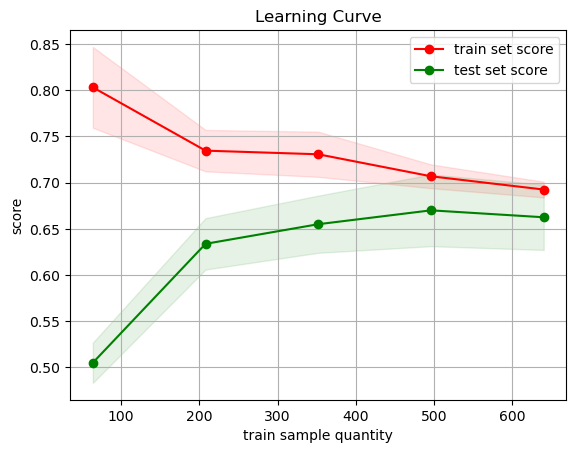

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    la courbe d'apprentissage
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("train sample quantity")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="train set score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="test set score")
    plt.legend(loc="best")
    return plt


# Générer un ensemble de données classifiées
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=3, random_state=42)

# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer des modèles de régression logistique
lr = LogisticRegression()

# Tracer des courbes d'apprentissage
plot_learning_curve(lr, 'Learning Curve', X_train, y_train, cv=5)

# Afficher les images
plt.show()

La courbe rouge de ce graphique représente l'évolution de la performance de l'ensemble d'entraînement en fonction de la taille de l'échantillon d'entraînement, tandis que la courbe verte représente l'évolution de la performance de l'ensemble de test. Le jeu de données est un ensemble de données de classification artificielle comprenant 1000 échantillons et 20 caractéristiques, dont 10 sont informatifs et répartis en 3 classes. L'analyse de la courbe d'apprentissage peut être abordée sous plusieurs angles :

La performance de l'ensemble d'entraînement augmente constamment à mesure que la taille de l'échantillon d'entraînement augmente, mais la courbe commence à s'aplatir lorsque la taille de l'échantillon atteint 500. Cela indique que l'ajout de données d'entraînement améliore la performance du modèle, mais qu'après un certain nombre d'exemples, l'ajout de données supplémentaires n'améliore plus significativement la performance du modèle.

La performance de l'ensemble de test augmente constamment à mesure que la taille de l'échantillon d'entraînement augmente, mais la courbe commence également à s'aplatir lorsque la taille de l'échantillon atteint 500. Cela indique que la capacité de généralisation du modèle s'améliore à mesure que la taille de l'échantillon augmente, mais qu'après un certain nombre d'exemples, l'ajout de données supplémentaires n'améliore plus significativement la capacité de généralisation du modèle.

La performance de l'ensemble d'entraînement est toujours supérieure à celle de l'ensemble de test, ce qui indique la présence de surajustement (overfitting) du modèle. Comme il s'agit d'un ensemble de données artificielles avec un grand nombre de caractéristiques, le surajustement est plus susceptible de se produire. Les méthodes pour résoudre le surajustement incluent l'ajout de données d'entraînement, la réduction du nombre de caractéristiques, la régularisation, etc.

Cette courbe montre comment la performance du modèle varie en fonction de la taille de l'échantillon d'entraînement. L'axe horizontal représente la taille de l'échantillon d'entraînement, tandis que l'axe vertical représente la performance du modèle (par exemple, l'exactitude ou le score F1). Dans cet exemple, nous avons utilisé un modèle de régression logistique et une validation croisée à 5 plis pour tracer la courbe d'apprentissage.

La courbe d'entraînement descendant indique que la performance du modèle s'améliore à mesure que la taille de l'échantillon d'entraînement augmente, car le modèle peut utiliser plus de données pour s'adapter et réduire le risque de surajustement. La courbe de test ascendante indique que la capacité de généralisation du modèle s'améliore également avec la taille de l'échantillon, ce qui signifie que le modèle peut mieux se généraliser aux données inconnues. 


In [24]:
#le coefficient de régularisation pénalité".

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Créer un modèle de régression logistique avec régularisation L2
lr = LogisticRegression(penalty='l2', C=0.1)

# Créer des pipelines avec normalisation et régularisation L2
pipe_lr = make_pipeline(StandardScaler(), lr)

# Ajustement du modèle à l'ensemble d'apprentissage
pipe_lr.fit(X_train, y_train)

# Évaluer la performance du modèle sur un ensemble de tests
test_score = pipe_lr.score(X_test, y_test)
print('test score：', test_score)


test score： 0.75


C = 0.1, testset score：0.75
C = 1, testset score：0.745
C = 10, testset score：0.745
C = 100, testset score：0.745
C = 1000, testset score：0.745


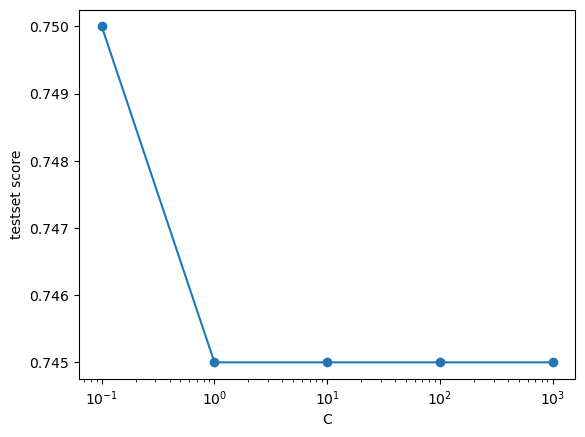

In [26]:
C_values = [0.1, 1, 10, 100, 1000]
test_scores = []

# Former des modèles de régression logistique pour différentes valeurs de C 
# et évaluer la performance des modèles sur un ensemble de tests.
for C in C_values:
    lr = LogisticRegression(penalty='l2', C=C)
    pipe_lr = make_pipeline(StandardScaler(), lr)
    pipe_lr.fit(X_train, y_train)
    test_score = pipe_lr.score(X_test, y_test)
    test_scores.append(test_score)
    print('C = {}, testset score：{}'.format(C, test_score))

# Tracer les courbes de validation
plt.plot(C_values, test_scores, 'o-')
plt.xlabel('C')
plt.ylabel('testset score')
plt.xscale('log')
plt.show()

Ce code implémente l'entraînement de modèles de régression logistique avec une régularisation L2 à différentes valeurs de la force de régularisation (C) et l'évaluation de leur performance sur un ensemble de test. Plus précisément, les valeurs de force de régularisation C sont définies à 0,1, 1, 10, 100 et 1000. Pour chaque valeur de C, un modèle de régression logistique régularisé L2 est entraîné, les données sont normalisées et les étapes sont combinées à l'aide d'un pipeline. Ensuite, la performance du modèle est évaluée sur l'ensemble de test et les scores sont enregistrés. Enfin, une courbe de validation est tracée pour évaluer la performance du modèle à différentes forces de régularisation.

La courbe de validation peut être utilisée pour choisir la meilleure force de régularisation. Plus précisément, nous pouvons rechercher le point le plus élevé sur la courbe de validation. Avant ce point, le modèle peut sous-apprendre, et après ce point, il peut sur-apprendre.

# Modèle de test de preuve confus

In [27]:
from sklearn.metrics import confusion_matrix

# Prédire les résultats de la classification sur un ensemble de tests
y_pred = pipe_lr.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Calculer des mesures telles que l'exactitude, la précision, le rappel
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
f1_score = 2 * precision * recall / (precision + recall)

# Imprimer la matrice de confusion et les indicateurs
print('Confusion matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Confusion matrix:
[[42 10  9]
 [16 62  3]
 [13  0 45]]
Accuracy: 0.745
Precision: 0.8611111111111112
Recall: 0.7654320987654321
F1-score: 0.8104575163398693


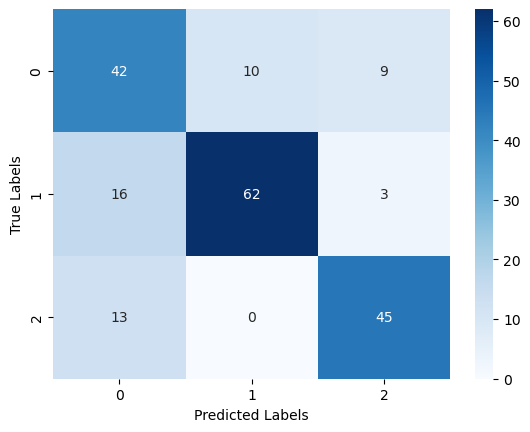

In [28]:
import seaborn as sns

# Carte thermique de la matrice de confusion
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Dans le code ci-dessus, nous avons utilisé le paramètre annot=True pour afficher les chiffres de la matrice sur la carte de chaleur, et le paramètre cmap='Blues' pour définir la carte de couleurs. Le paramètre fmt='g' est utilisé pour définir le format des nombres. Enfin, nous avons ajouté des étiquettes au graphique avec les fonctions xlabel() et ylabel(), puis affiché le graphique avec la fonction show().

Après avoir tracé la carte de chaleur, nous pouvons observer de manière plus intuitive les performances du modèle de classification, en particulier les relations entre les vrais positifs, les faux positifs, les vrais négatifs et les faux négatifs. Plus la couleur de la carte de chaleur est foncée, plus le nombre d'échantillons est élevé pour cette classification. L'angle supérieur gauche de la carte a la couleur la plus foncée, ce qui représente le plus grand nombre d'échantillons dont les étiquettes réelles et les étiquettes prédites sont toutes deux de cette catégorie. Il s'agit généralement d'une des zones les plus importantes de la matrice de confusion, car elle montre le nombre d'échantillons correctement identifiés par le classificateur.

# ROC

La courbe ROC est un graphique qui montre la relation entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR) d'un modèle de classification binaire à différents seuils. Le TPR est le rapport entre le nombre d'échantillons réellement positifs et correctement identifiés en tant que positifs sur le nombre total d'échantillons positifs, soit TPR = TP / (TP + FN) ; le FPR est le rapport entre le nombre d'échantillons réellement négatifs mais incorrectement identifiés en tant que positifs sur le nombre total d'échantillons négatifs, soit FPR = FP / (FP + TN). La courbe ROC peut être utilisée pour mesurer la capacité de classification d'un modèle, et la surface sous la courbe (AUC) peut refléter la précision de prédiction du modèle, plus l'AUC est grande, plus la précision de classification du modèle est élevée. Veuillez noter que plus la surface sous la courbe ROC est proche de 1, meilleure est la performance du modèle.

Résultats de la validation croisée： 0.7310464988345468
Score de lensemble des tests： 0.7333216137821922


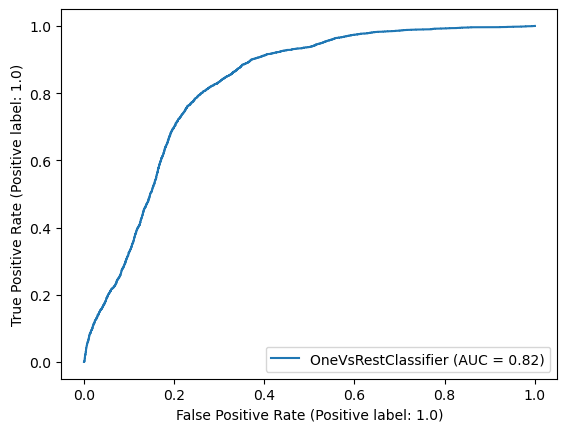

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X = df.drop(["class-GALAXIE", "class-QSO", "class-ETOILE"], axis=1) # Matrice des caractéristiques
y = df['class-GALAXIE'] # Variables cibles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer des modèles de régression logistique
lr = LogisticRegression()

# Convertir les problèmes de multiclassification en problèmes de biclassification
clf = OneVsRestClassifier(lr)

# Évaluer les performances du modèle à l'aide de la validation croisée
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Résultats de la validation croisée
print('Résultats de la validation croisée：', scores.mean())

# Modèles de formation
clf.fit(X_train, y_train)

# Évaluer la performance du modèle sur un ensemble de tests
test_score = clf.score(X_test, y_test)
print('Score de lensemble des tests：', test_score)

# Tracé des courbes ROC
plot_roc_curve(clf, X_test, y_test)
plt.show()


Le taux de rappel, peut être représenté par la courbe rappel-précision ou la courbe taux de rappel-threshold. Ces courbes montrent la relation entre le taux de rappel et la précision (ou le seuil).

La courbe rappel-précision représente la relation entre le taux de rappel et la précision, où le taux de rappel est l'axe y de la courbe et la précision est l'axe x. La courbe montre un compromis entre le taux de rappel et la précision. Plus le taux de rappel est élevé, plus la précision est faible, et vice versa. Si nous voulons à la fois un taux de rappel et une précision élevés, nous pouvons choisir le meilleur seuil sur la courbe.

La courbe taux de rappel-threshold représente la relation entre le taux de rappel et le seuil, où le taux de rappel est l'axe y de la courbe et le seuil est l'axe x. La courbe montre un compromis entre le taux de rappel et le seuil. Un seuil plus élevé entraînera un taux de rappel plus faible, tandis qu'un seuil plus bas entraînera un taux de rappel plus élevé. Si nous voulons un taux de rappel élevé, nous pouvons choisir le meilleur seuil sur la courbe.

En français, pour calculer le rappel, il faut connaître le nombre de vrais positifs et de faux négatifs. Dans la classification binaire, un vrai positif est un échantillon qui a été correctement classé comme positif, tandis qu'un faux négatif est un échantillon qui est réellement positif mais qui a été classé à tort comme négatif. Le rappel est défini comme le nombre d'échantillons correctement classés comme positifs divisé par le nombre total d'échantillons positifs. La formule de calcul est :

rappel = vrais positifs / (vrais positifs + faux négatifs)

Dans cet exemple, nous nous concentrons uniquement sur la classification avec la variable cible "class-GALAXY". Par conséquent, nous pouvons utiliser la fonction confusion_matrix pour calculer le nombre de vrais positifs et de faux négatifs, puis calculer le rappel.

La précision et le rappel sont des mesures d'évaluation courantes dans la classification binaire. La précision mesure la proportion de vrais positifs parmi les échantillons prédits comme positifs, tandis que le rappel mesure la proportion d'échantillons réellement positifs qui ont été prédits comme tels. En général, il existe un compromis entre le rappel et la précision, lorsque nous essayons d'améliorer la précision, le rappel a tendance à diminuer, et vice versa.

Dans certains scénarios, l'importance du rappel et de la précision peut être différente. Par exemple, dans la détection du cancer, nous accordons plus d'importance au rappel, c'est-à-dire capturer autant de patients malades que possible, même si cela peut entraîner quelques résultats faux positifs. En revanche, dans la classification des spams de courrier électronique, nous accordons plus d'importance à la précision, car nous souhaitons réduire les fausses alertes de courrier indésirable.

En pratique, nous pouvons utiliser la mesure F1 pour évaluer la performance globale du rappel et de la précision. La mesure F1 est la moyenne harmonique de la précision et du rappel, et atteint sa valeur maximale lorsque la précision et le rappel sont tous deux élevés. Ainsi, la mesure F1 peut nous aider à trouver un point d'équilibre pour atteindre un bon équilibre entre le rappel et la précision.

# Essayez d'autres modèles et analysez la précision Nous choisissons le deuxième modèle : machine à vecteur de support SVM

In [30]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,class-GALAXIE,class-QSO,class-ETOILE
0,0.379575,-2.580113,0.448007,0.001634,0.215943,-0.698166,1.0,0.0,0.0
1,-0.376989,2.535592,-0.325388,-1.134650,0.354720,0.056924,1.0,0.0,0.0
2,0.321800,-2.401866,-0.251675,0.534032,0.074887,0.058895,1.0,0.0,0.0
3,-0.043073,-0.420810,-0.116922,0.240209,-1.838024,-0.095070,1.0,0.0,0.0
4,-0.066674,-0.047009,-0.439459,0.162686,-0.752689,0.462632,1.0,0.0,0.0


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(["class-GALAXIE", "class-QSO", "class-ETOILE"], axis=1)# Matrice des caractéristiques
y = df['class-GALAXIE'] # Vecteur cible, choisi ici pour prédire les galaxies

# Diviser l'ensemble de données en un ensemble d'entraînement et un ensemble de test, où test_size indique 
# la proportion de l'ensemble de test par rapport au nombre total d'échantillons, 
# et random_state est la graine du générateur de nombres aléatoires, utilisé pour répéter l'expérience.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.379575,-2.580113,0.448007,0.001634,0.215943,-0.698166
1,-0.376989,2.535592,-0.325388,-1.134650,0.354720,0.056924
2,0.321800,-2.401866,-0.251675,0.534032,0.074887,0.058895
3,-0.043073,-0.420810,-0.116922,0.240209,-1.838024,-0.095070
4,-0.066674,-0.047009,-0.439459,0.162686,-0.752689,0.462632


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import learning_curve

# Créer des objets de modèle SVM
svm = SVC(kernel='linear')

# Ajustement d'un modèle SVM à l'aide de l'ensemble d'apprentissage
svm.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test et produire la matrice de confusion
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[6396 1205]
 [1738 2038]]


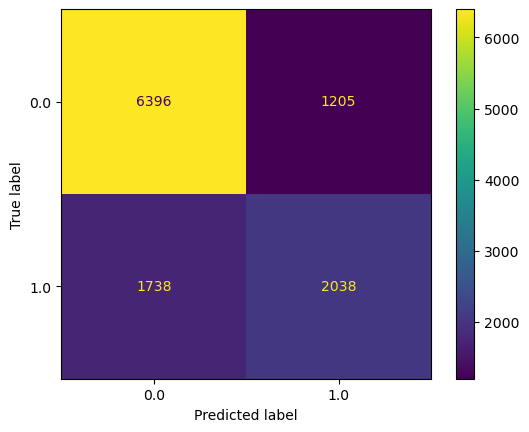

In [33]:
# Visualisation de la matrice de confusion
plot_confusion_matrix(svm, X_test, y_test)

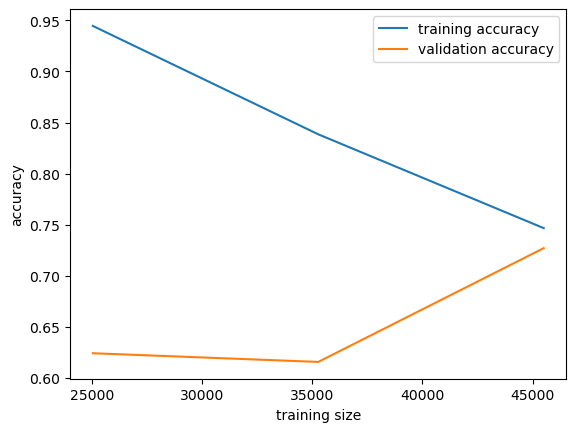

In [34]:
# Courbe d'apprentissage de la visualisation
train_sizes, train_scores, test_scores = learning_curve(svm, X, y, cv=5, scoring='accuracy', n_jobs=-1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='validation accuracy')
plt.xlabel('training size')
plt.ylabel('accuracy')
plt.legend()

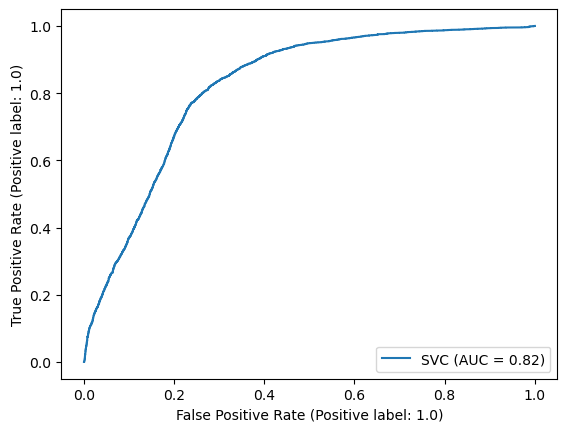

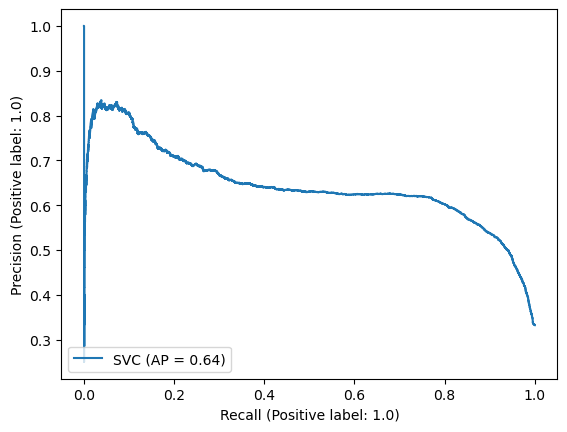

In [35]:
# Courbes ROC visuelles et courbes de précision-rappel
plot_roc_curve(svm, X_test, y_test)
plot_precision_recall_curve(svm, X_test, y_test)

In [42]:
from sklearn.metrics import accuracy_score
# Faire des prédictions sur l'ensemble des tests et produire la matrice de confusion et la précision.
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix：\n", conf_mat)
print("accuracy:", accuracy)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

# Decision tree

Il existe deux types principaux d'arbre de décision:

    les arbres de classification: permettent de prédire à quelle classe la variable-cible appartient, dans ce cas la prédiction est une étiquette de classe.
    les arbres de régression: permettent de prédire une quantité réelle (par exemple, le prix d'une maison ou la durée de séjour d'un patient dans un hôpital), dans ce cas la prédiction est une valeur numérique.
    
Dans notre projet, on choisit les arbres de classification.

Les algorithmes pour construire les arbres de décision sont construits en divisant l'arbre du sommet vers les feuilles en choisissant à chaque étape une variable d'entrée qui réalise le meilleur partage de l'ensemble d'objets

Pour choisir la variable de séparation sur un nœud, les algorithmes testent les différentes variables d'entrées possibles et sélectionnent celles qui maximisent un critère donné.

Les critères de sélection des caractéristiques incluent le gain d'information et indice de Gini. Les algorithmes ID3 et C4.5 (utilisant le taux de gain d'information) sont utilisés pour le gain d'information, et l'algorithme CART utilisant le coefficient de Gini.

Indice de Gini:
L'indice de Gini Gini (D) représente l'incertitude de l'ensemble D, et l'indice de Gini Gini (D, A = a) représente l'incertitude de l'ensemble D divisé par A = a .
$$Gini(p)=\sum_{k=1}^{k} p_k (1 - p_k)= 1− \sum_{k=1}^k p_k^2$$
Si l'ensemble d'échantillons D est divisé en deux parties D1 et D2 selon que le caractéristique A prend une certaine valeur possible a, alors sous la condition de la caractéristique A, l'indice de Gini de l'ensemble D est：
$$Gini(D, A = a) = \frac{\mid D1 \mid } {\mid D \mid} Gini(D_1) + \frac{\mid D2 \mid } {\mid D \mid} Gini(D_2)$$
Plus l'indice de Gini est petit, plus l'incertitude de l'échantillon est faible.

In [37]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,class-GALAXIE,class-QSO,class-ETOILE
0,0.379575,-2.580113,0.448007,0.001634,0.215943,-0.698166,1.0,0.0,0.0
1,-0.376989,2.535592,-0.325388,-1.134650,0.354720,0.056924,1.0,0.0,0.0
2,0.321800,-2.401866,-0.251675,0.534032,0.074887,0.058895,1.0,0.0,0.0
3,-0.043073,-0.420810,-0.116922,0.240209,-1.838024,-0.095070,1.0,0.0,0.0
4,-0.066674,-0.047009,-0.439459,0.162686,-0.752689,0.462632,1.0,0.0,0.0


Confusion matrix:
[[4890  503  433]
 [ 466 5099   46]
 [ 404   59 5165]]
Accuracy: 0.8880164078523294
Precision: 0.8878026920312776
Recall: 0.8880164078523294
F1-score: 0.8878937357704082


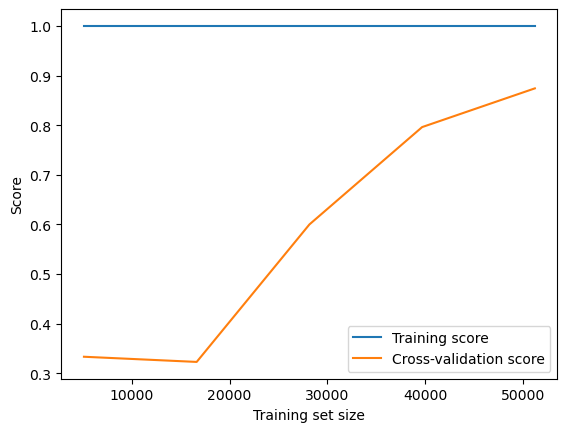

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X = df.drop(['class-GALAXIE', 'class-QSO', 'class-ETOILE'], axis=1)
y = df[['class-GALAXIE', 'class-QSO', 'class-ETOILE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Créer un modèle d'arbre de décision et ajuster les données
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prédire les données de l'ensemble des tests et calculer les mesures d'évaluation
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

# Imprimer la matrice de confusion et les indicateurs d'évaluation
print('Confusion matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

# Tracer des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend()
plt.show()



Ce graphique est une courbe d'apprentissage qui représente les scores de l'ensemble d'entraînement et de validation croisée en fonction de la taille de l'ensemble d'entraînement. Le score de l'ensemble d'entraînement mesure la performance du modèle ajusté sur l'ensemble d'entraînement, tandis que le score de validation croisée est la moyenne de la performance du modèle calculée sur différents ensembles d'entraînement et de validation.

Dans ce graphique, le score de l'ensemble d'entraînement est constant à 1, ce qui signifie que le modèle ajusté s'adapte parfaitement à l'ensemble d'entraînement, mais le score de validation croisée augmente lentement avec l'augmentation de la taille de l'ensemble d'entraînement, ce qui indique que la performance de généralisation du modèle s'améliore progressivement. Lorsque le score de validation croisée atteint sa valeur maximale, nous pouvons voir que le modèle a trouvé la meilleure taille d'ensemble d'entraînement, et l'augmentation de la taille de l'ensemble d'entraînement ne contribuera plus à améliorer la performance du modèle. Si la différence entre le score de l'ensemble d'entraînement et le score de validation croisée est importante, cela indique un risque de surajustement du modèle, qui peut être résolu en ajustant les hyperparamètres du modèle ou en augmentant la taille de l'ensemble d'entraînement.

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Dessiner des arbres de décision
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['GALAXY', 'QSO', 'STAR'])
plt.show()

En observant les graphiques de visualisation d'arbre de décision et d'impureté de Gini, nous pouvons comprendre que :

L'impureté de Gini mesure la pureté de l'ensemble de données de chaque nœud. Plus l'impureté de Gini est faible, plus les données de ce nœud sont pures, ce qui signifie que l'effet de la division est meilleur.
L'arbre de décision commence à se diviser progressivement à partir du nœud racine, chaque condition de division correspondant à un nœud, jusqu'à ce que toutes les feuilles soient pures (ne contenant qu'une seule catégorie). La profondeur et le nombre de nœuds de l'arbre de décision dépendent de la complexité de l'ensemble de données et des paramètres de l'algorithme de l'arbre de décision.
L'arbre de décision peut nous aider à comprendre les caractéristiques et la distribution des données, ainsi que l'importance des différentes caractéristiques, afin de nous aider dans l'analyse des données et la prise de décisions.

# Modele4 Random Forest

Le fonctionnement de la forêt aléatoire :

L'ensemble d'entraînement de la forêt aléatoire est constitué d'un ensemble d'échantillons sélectionnés au hasard, pouvant être obtenus par échantillonnage avec remplacement ou échantillonnage aléatoire.

La forêt aléatoire utilise des arbres de décision comme modèle de base. Lors de la construction de chaque arbre de décision, la forêt aléatoire utilise deux types de hasard : la sélection aléatoire d'échantillons et la sélection aléatoire de caractéristiques.

Pour chaque arbre de décision, il est entraîné sur une partie des caractéristiques et des échantillons. Pendant l'entraînement, pour chaque nœud, la forêt aléatoire sélectionne au hasard un sous-ensemble de caractéristiques à partir de l'ensemble de caractéristiques du nœud, puis sélectionne le meilleur point de division en fonction de ces caractéristiques.

L'entraînement de l'arbre de décision se poursuit jusqu'à ce que la condition d'arrêt spécifiée soit atteinte, comme une profondeur maximale de l'arbre, un nombre minimum d'échantillons par nœud ou plus de caractéristiques disponibles pour la division.

Dans une forêt aléatoire, pour éviter le surajustement, le nombre de caractéristiques utilisées pour diviser chaque nœud est limité. Ainsi, chaque arbre de décision est plus indépendant et les erreurs de chaque arbre ne sont pas amplifiées par les autres arbres.

Le résultat de la prédiction de la forêt aléatoire est obtenu en votant pour toutes les prédictions des arbres de décision. Dans un problème de classification, chaque arbre de décision vote pour chaque classe et le résultat final est la classe avec le plus de votes. Dans un problème de régression, chaque arbre de décision prédit une valeur et le résultat final est la moyenne des valeurs prédites par tous les arbres de décision.

In [ ]:
# Classification de la forêt aléatoire importée
from sklearn.ensemble import RandomForestClassifier

# Créer un objet de classification de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100)

# Formation avec des ensembles de données
clf.fit(X_train, y_train)

# Prédiction des données de test
y_pred = clf.predict(X_test)

# calculer l'accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy：", accuracy)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Fonctions de la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("sample numbel ")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="train set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="test set")
    plt.legend(loc="best")
    return plt

# Tracer des courbes d'apprentissage
title = "Learning Curves (Random Forest)"
plot_learning_curve(clf, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=4)

plt.show()
